In [1]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

%matplotlib inline

In [2]:
#Reading the UBER Case Study file

uber = pd.read_csv('Uber Request Data.csv')
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [3]:
# Checking the details of the dataframe
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 210.8+ KB


----


### Looking at the datatypes in the above result we can conclude following things.


#### 1. "Driver id" column is a float. It can be converted into 'object' type but for now we will not modify it.


#### 2. "Request timestamp" and "Drop timestamp" columns are in 'object' type. We need to convert both in 'datetime' format.



----

In [4]:
#Converting objects into datetime

uber['Request timestamp'] =  pd.to_datetime(uber['Request timestamp'],dayfirst=True)
uber['Drop timestamp'] =  pd.to_datetime(uber['Drop timestamp'],dayfirst=True)
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 263.5+ KB


In [5]:
# Checking for the null values

uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


----

#### In the above output, columns 'Driver id' and 'Drop timestamp' has null values. General tendency is to eliminate null values.

#### But in this case 'Pickup point' and 'Request id' do not have any null values. So it means in many cases, cabs may not be available and hence there are null values in Driver id.

#### In that case the 'Drop timestamp' column should have same number of null values as that of 'Driver id'. But here we see more null values in 'Drop timestamp'. This can be attributed to the number of trips cancelled by the driver.


### Conclusion:
#### We should keep the null values as it is and proceed with our analysis.


----

In [6]:
uber['Request date'] =uber['Request timestamp'].dt.date
uber['Request time'] =uber['Request timestamp'].dt.time
uber['Request Hour'] = pd.DataFrame([(x.hour) for x in uber['Request time']])
uber['Drop date'] =uber['Drop timestamp'].dt.date
uber['Drop time'] =uber['Drop timestamp'].dt.time
uber['Drop Hour'] = pd.DataFrame([(x.hour) for x in uber['Drop time']])
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request Hour,Drop date,Drop time,Drop Hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,13.0
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,18.0
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,9.0
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,22.0
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0



----
Here I have simply segregated the 'TIMESTAMP' columns into "DATE', 'TIME' and 'HOURS' which could simplify my further analysis of the dataframe.

The 'Drop Hour' column is generated as float due to presence of null values in it. I would keep it as it is.

----

Now lets create 6 slots of time for ease of analysis
1. Late Night (12am to 4am)
2. Early Moning (4am to 8am)
3. Morning (8am to 12pm)
4. Afternoon (12pm to 4pm)
5. Evening (4pm to 8pm)
6. Night (8pm to 12am)

----

In [7]:
uber = uber.assign(
    Request_Slot=pd.cut(
        uber['Request timestamp'].dt.hour,
        [-1, 4, 8, 12, 16, 20, 24],
        labels=['Late Night', 'Early Morning', 'Morning','Afternoon', 'Evening','Night']))

uber = uber.assign(
    Drop_Slot=pd.cut(
        uber['Drop timestamp'].dt.hour,
        [-1, 4, 8, 12, 16, 20, 24],
        labels=['Late Night', 'Early Morning', 'Morning','Afternoon', 'Evening','Night']))
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request Hour,Drop date,Drop time,Drop Hour,Request_Slot,Drop_Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,11,2016-07-11,13:00:00,13.0,Morning,Afternoon
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,17,2016-07-11,18:47:00,18.0,Evening,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,9.0,Morning,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,21,2016-07-12,22:03:00,22.0,Night,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0,Early Morning,Morning


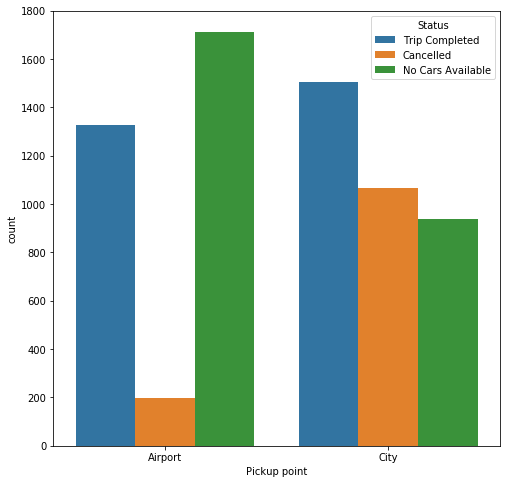

In [8]:
# Plotting the number of requests on basis of status

plt.figure(figsize=(8, 8))
sns.countplot(x="Pickup point", hue = 'Status', data=uber);

In [9]:
#Creating the pivot table to check the exact values

pivot = pd.pivot_table(uber, values = 'Request id', index = 'Pickup point', columns= 'Status', aggfunc = 'count')
pivot.head()

Status,Cancelled,No Cars Available,Trip Completed
Pickup point,,,
Airport,198,1713,1327
City,1066,937,1504


----

As you can clearly see in the table and the chart above, the unavailability of cabs is more at Airport. 
(1713 which is nearly twice as much as that of City '937')

So we need to first focus our study to Airport as pickup point.

Lets create 2 different dataframes
1. Having all Airport as pickup point
2. Having all City as pickup point

----

In [10]:
#Creating two different dataframes with Airport and City as pickup point respectively

uber_arpt = uber[(uber['Pickup point']=='Airport')]
uber_city = uber[(uber['Pickup point']=='City')]

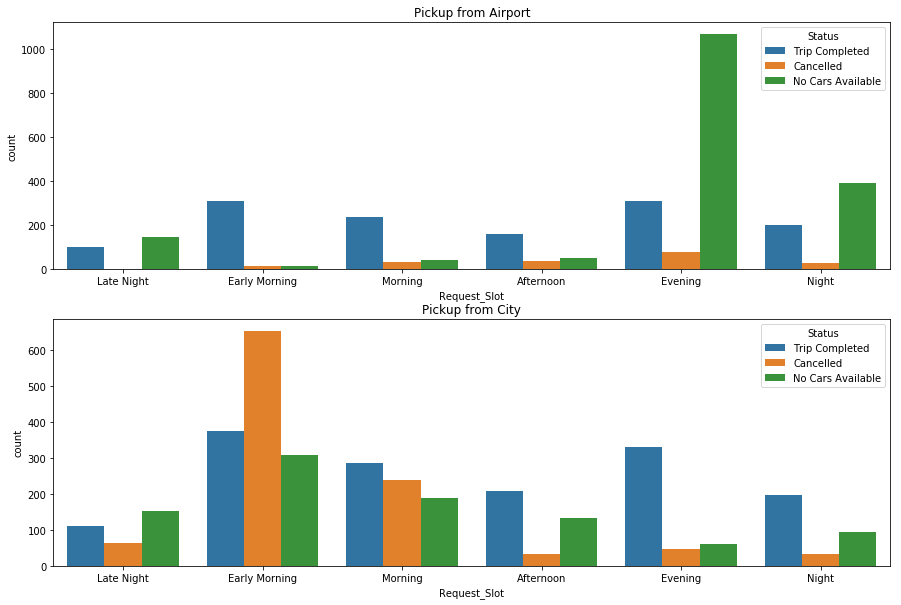

In [11]:
#Comparing cab requests of both the dataframes with respect to time slot

plt.figure(figsize=(15, 10))

#subplot 1

plt.subplot(2, 1, 1)
plt.title('Pickup from Airport')
sns.countplot(x="Request_Slot", hue = 'Status', data=uber_arpt);


#subplot 2

plt.subplot(2, 1, 2)
sns.countplot(x="Request_Slot", hue = 'Status', data=uber_city);
plt.title('Pickup from City')

plt.show()


----

Above graph gives brief idea about when there is high demand for Cabs at both location.

### Airport to City

1. Airport shows highest demands of cab in the evening i.e. 4pm to 8pm and there is very few availability of cabs at that time. 
   More than 1000 requsts don't find cabs at that time.
   
2. This defficiency of cabs can be attributed to the number of trips to Airport from city. Considering 2 to 2.5 hours time to      reach airport, lets us assume the cabs in 'Afternoon slot' to reach the airport. 

3. The number of trips completed from city in afternoon is nearly 200 and evening is 350 which whic when summed both is less        than half of the request of cabs from Airport in evening.

### City to Airport

1. Great number of cancellation is observed in the  Early Morning slot(4am to 8am) for the cabs from city to airport.

2. Cancellation can be attributed as drivers issue as people going to airport have fixed plans and their chances to cancel is less.

3. Also for the return journey, we can see that there are very few requests from Airport in 'Early Morning' and 'Morning Slot'



### Let us focus on individual (Airport/ City) supply and demand gap analysis separately

----

### First let us focus only on Airport issue

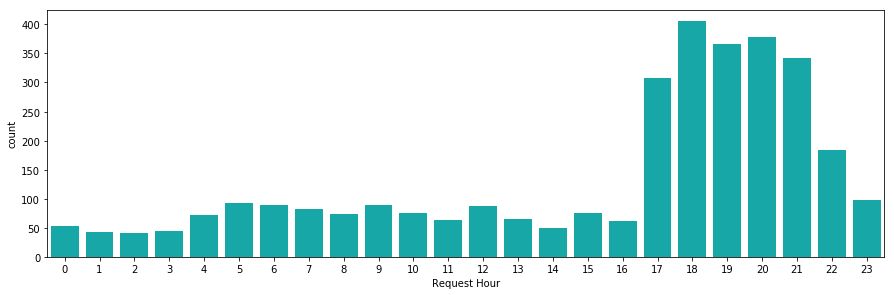

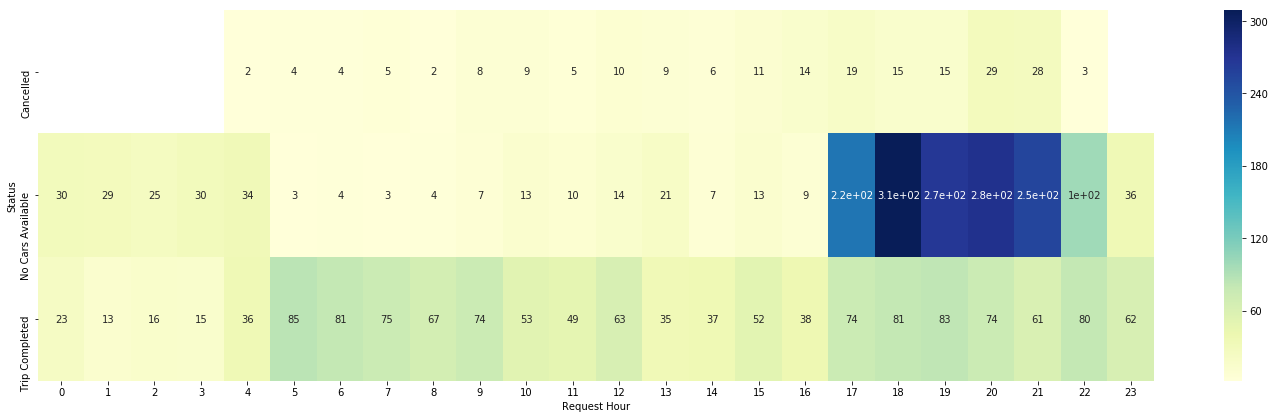

In [12]:
# Plotting the number of requests on hourly basis
plt.figure(figsize=(15, 10))
#subplot 1

plt.subplot(2, 1, 1)
sns.countplot(x="Request Hour",  data=uber_arpt, color="c")

plt.figure(figsize=(25, 15))
#subplot 2
pivot_ap = pd.pivot_table(uber_arpt, values = 'Request id', index = 'Status', columns= 'Request Hour', aggfunc = 'count')
plt.subplot(2, 1, 2)
#Heat map on hourly basis requests for Airport
sns.heatmap(pivot_ap,  annot = True, cmap="YlGnBu")



 
 ----
 
1. On plotting the hourly demand of cabs at airport location, we can see that the demand is high from 5pm ro 9pm, the highest being at 6pm. 

2. At the same time the unavailability of cab is highest at 6pm as seen from heatmap.

In [13]:
# Creating table for demand and supply gap

arpt_ds = pd.pivot_table(uber_arpt, values = 'Request id', index = 'Request Hour', columns= 'Status', aggfunc = 'count')
arpt_ds['Cancelled'].fillna(0, inplace = True)
arpt_ds['Demand'] = arpt_ds['Trip Completed'] + arpt_ds['No Cars Available'] + arpt_ds['Cancelled']
arpt_ds.drop(['Cancelled','No Cars Available'], axis=1, inplace= True)
arpt_ds.rename(columns={'Trip Completed':'Supply'}, inplace=True)
arpt_ds['Gap'] = arpt_ds['Demand'] - arpt_ds['Supply']

In [14]:
arpt_ds.head()

Status,Supply,Demand,Gap
Request Hour,,,
0,23.0,53.0,30.0
1,13.0,42.0,29.0
2,16.0,41.0,25.0
3,15.0,45.0,30.0
4,36.0,72.0,36.0


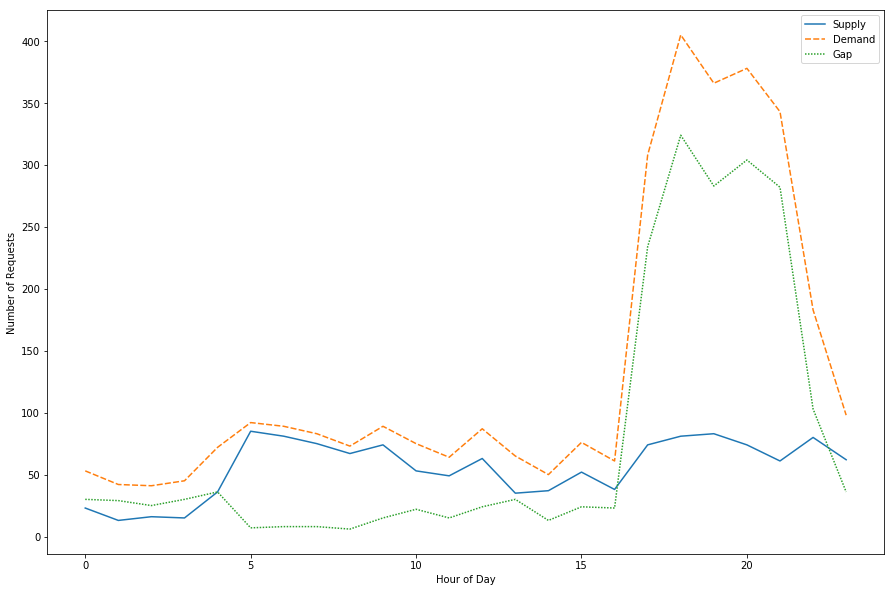

In [15]:
#plotting the graph for supply and demand gap on the hour scale

plt.figure(figsize=(15, 10))

sns.lineplot(hue="Status", data=arpt_ds)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()

----
### Now it is evident that the gap between supply and demand is drastically rises after 4pm and stays high till 10 - 11 pm and then reduces angain. Why is this hapenning? Wee need to study for the same.

### For this study we need to check how many cabs are coming to airport from city. This can be checked by checking the drop time for all the cars, and thus calculating the number of cars at that time.
----

In [16]:
#Let us consider the City dataframe and remove all the rows which did no complete the trip

uber_city_1 = uber_city[~np.isnan(uber_city['Drop Hour'])]
uber_city_1 = pd.pivot_table(uber_city_1, values = 'Request id', index = 'Drop Hour', columns= 'Status', aggfunc = 'count')
uber_city_1.head()

Status,Trip Completed
Drop Hour,
0.0,42
1.0,16
2.0,13
3.0,22
4.0,15


In [17]:
#Creating a column 'Cab Arriving' to airport which is nothing but 'Trip Completed' from city to airport
arpt_ds['Cabs Arriving'] = uber_city_1['Trip Completed']
arpt_ds_gap = arpt_ds.drop(['Supply','Gap'], axis=1)
arpt_ds_gap.head()

Status,Demand,Cabs Arriving
Request Hour,,
0,53.0,42
1,42.0,16
2,41.0,13
3,45.0,22
4,72.0,15


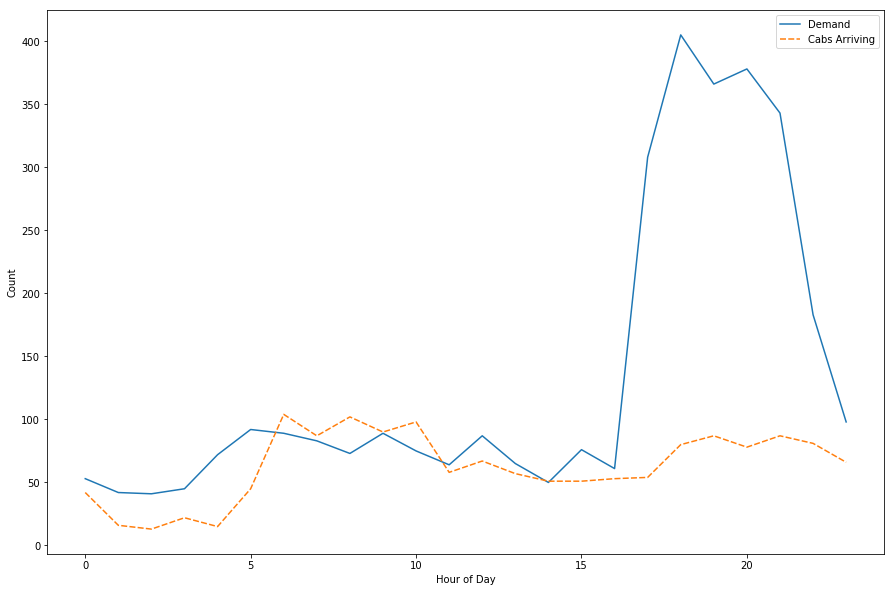

In [18]:
# Plotting gap between number of requests from airport and cabs arriving at airport

plt.figure(figsize=(15, 10))

sns.lineplot(hue="Status", data=arpt_ds_gap)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

----

### Now it has been evident that the cabs coming to airport are very less as compared to demand in the peak hours of 5pm to 10 pm. The requests are as high as 400 and the number of cars available are nearby 100.

### Hence there is a need of sending more cabs to airport at this peak hours.


## ---------------------------------------------------------------------------------------------------------------------------------


### No lets focus our discussion to the issue of cabs in City

----

Let us create a similar chart that we created for airport analysis

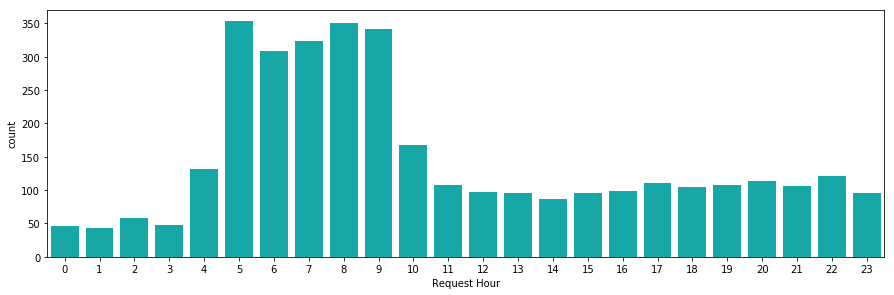

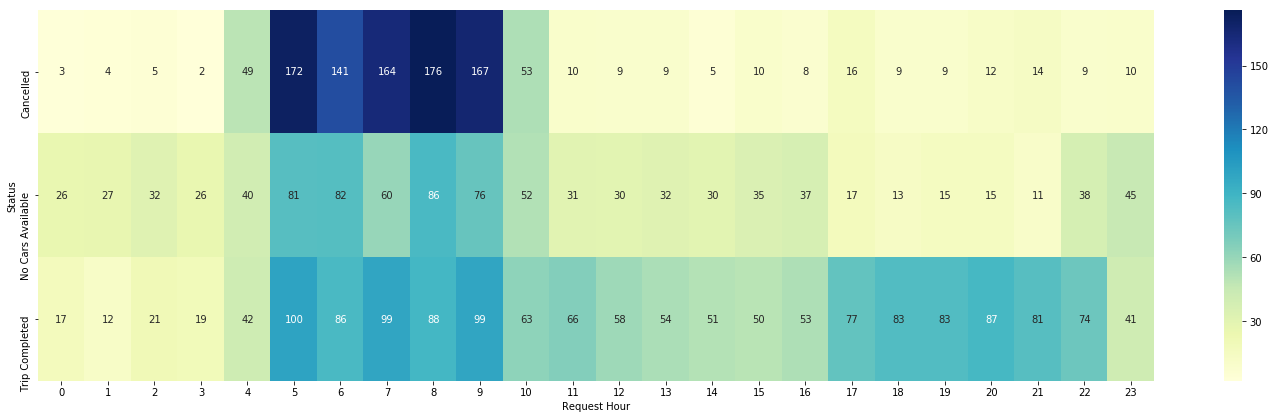

In [19]:
#Similar study done for City as done for Airport

plt.figure(figsize=(15, 10))
#subplot 1

plt.subplot(2, 1, 1)
sns.countplot(x="Request Hour",  data=uber_city, color="c")

plt.figure(figsize=(25, 15))
#subplot 2
pivot_ct = pd.pivot_table(uber_city, values = 'Request id', index = 'Status', columns= 'Request Hour', aggfunc = 'count')
plt.subplot(2, 1, 2)
#Heat map on hourly basis requests for Airport
sns.heatmap(pivot_ct,  annot = True, fmt = 'd' ,  cmap="YlGnBu")

### Here the most pressing issue is the cancellation of cabs from the city to the airport. The demand is high from 4am to 9am. At the same time the cancellation is also high, maximum being at 8am


### Now let us check why this is hapenning. As we have checked earlier, there are very few requests from airport in the morning and hence we concluded that the drivers are cancelling it for that reason. Let us prove it with values and graphs


In [20]:
# Providin Drop time to the null values by adding 1 to the request time

uber_city.loc[pd.isnull(uber_city['Drop Hour']), ['Drop Hour']] = uber_city['Request Hour'] + 1.0
uber_city.head()

C:\Users\SMIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Request Hour,Drop date,Drop time,Drop Hour,Request_Slot,Drop_Slot
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,9,2016-07-12,09:58:00,9.0,Morning,Morning
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,8,2016-07-13,09:25:47,9.0,Early Morning,Morning
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,17,2016-07-15,18:50:51,18.0,Evening,Evening
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,6,2016-07-11,07:25:00,7.0,Early Morning,Early Morning
11,1983,City,2.0,Trip Completed,2016-07-12 12:30:00,2016-07-12 12:57:00,2016-07-12,12:30:00,12,2016-07-12,12:57:00,12.0,Morning,Morning


-----
Follow assumptions are made in this case to check the reason of cancellation.

1. All the requests are acceted and the trip is completed.
2. Average of 1 hour travel is assumed to airport to check the inflow of cabs in the airport.
3. so the 'Drop Hour' is 1 plus the 'Request Hour' only for the cases where the cabs were cancelled.

----

In [21]:
# Creating Pivot Table for supply demand gap in the city
uber_city_ds = pd.pivot_table(uber_city, values = 'Request id', index = 'Drop Hour', columns= 'Status', aggfunc = 'count')
uber_city_ds['Cancelled'].fillna(0, inplace = True)
uber_city_ds['No Cars Available'].fillna(0, inplace = True)
uber_city_ds['Total Inflow'] = uber_city_ds['Trip Completed'] + uber_city_ds['No Cars Available'] + uber_city_ds['Cancelled']
uber_city_ds.head()

Status,Cancelled,No Cars Available,Trip Completed,Total Inflow
Drop Hour,,,,
0.0,0.0,0.0,42.0,42.0
1.0,3.0,26.0,16.0,45.0
2.0,4.0,27.0,13.0,44.0
3.0,5.0,32.0,22.0,59.0
4.0,2.0,26.0,15.0,43.0


In [22]:
# Dataframe to compare the number of assumed Cabs entering airport and the requests from the airport

uber_city_ds['Airport Demand'] = arpt_ds['Demand']
uber_city_ds.drop(['Cancelled','No Cars Available','Trip Completed'], axis=1, inplace= True)
uber_city_ds.head()

Status,Total Inflow,Airport Demand
Drop Hour,,
0.0,42.0,53.0
1.0,45.0,42.0
2.0,44.0,41.0
3.0,59.0,45.0
4.0,43.0,72.0


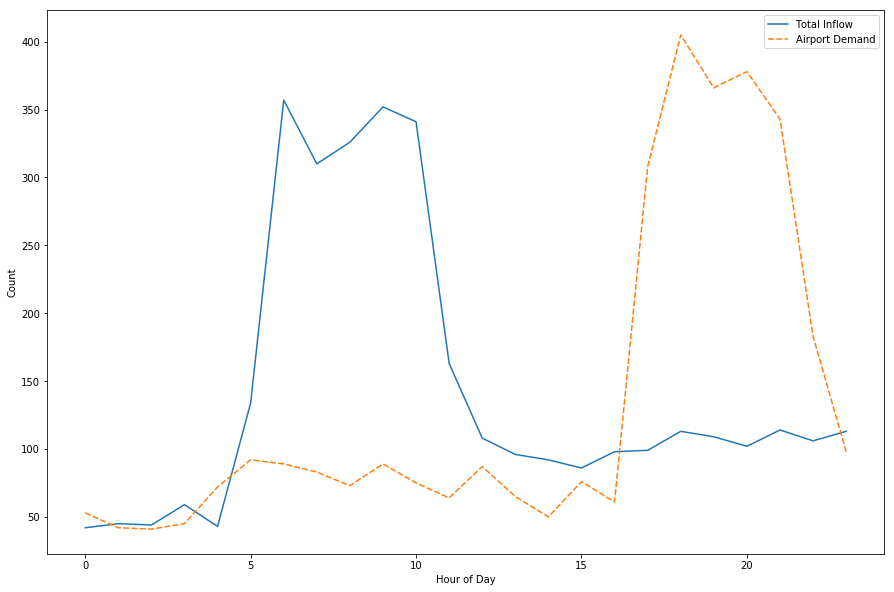

In [23]:
#plot of Inflow and outflow of cabs in the airport

plt.figure(figsize=(15, 10))

sns.lineplot(hue="Status", data=uber_city_ds)
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

#### As seen from the above graph, if all the drivers accept the trip in the morning, they hardly have any ride back to city. Therefore the cancellation of trip is higher in the morning.

## CONCLUSION

### Airport Supply Demand Gap: (Reasons)

#### 1. Flights landing in the evening 5pm to 10pm are higher as the requests are higher.
#### 2. At the same time the flights boarding in that time span is less which can be concluded from the number of cabs arriving to airport from city.
#### 3. This can be the cause for non-availability of cabs


### Cab Supply Demand Gap: (Reasons

#### 1. Higher number of flight taking of in the morning.
#### 2. Very few flights landing in the morning which makes return trip for drivers a long wait.
#### 3. To reduce this loss, the drivers cancel the trips